In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../../../..')
from omama import gp2
from omama.gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

In [3]:
R = Runner(classifier='kattunet2d',
           filter_num=[16, 32, 64, 128, 256],
           stack_num_down=2,
           stack_num_up=2,
           activation='ReLU',
           atten_activation='ReLU',
           attention='add',
           output_activation='Sigmoid',
           batch_norm=False,
           pool=False,
           unpool=False,
           weights='imagenet',
           optimizer= None, #None = default is optimizers.Adam(learning_rate=1e-3)
           loss=None, #None = default is losses.binary_crossentropy
           metric=None # None = default is Util.dice_coef
          )

*** GP2 KATTUnet2D ***
Working directory: /tmp/tmp74kc4ot1GP2


In [4]:
# load our larger toy dataset (10k images and masks)
# load our larger toy dataset (10k images and masks)
images = np.load('/raid/mpsych/GP2TOYEXAMPLE_LARGE/images.npy')
masks = np.load('/raid/mpsych/GP2TOYEXAMPLE_LARGE/masks.npy')

In [6]:
images.shape

(10000, 512, 512, 1)

In [7]:
masks.shape

(10000, 512, 512, 1)

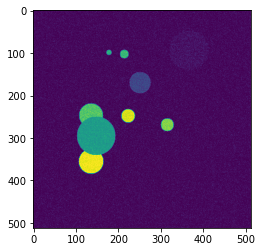

In [9]:
imshow(images[5])

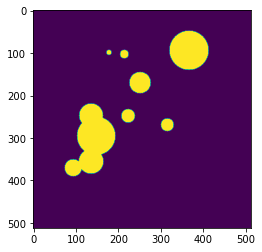

In [8]:
imshow(masks[5])

In [10]:
R.run(images=images, masks=masks, runs=8)

Weights OK!
******
Loop 1
Epoch 1/100
8/8 [==============================] - 30s 2s/step - loss: 0.8441 - dice_coeff: 0.1673 - val_loss: 0.7287 - val_dice_coeff: 0.1678
Epoch 2/100
8/8 [==============================] - 7s 976ms/step - loss: 0.6794 - dice_coeff: 0.1665 - val_loss: 0.6140 - val_dice_coeff: 0.1663
Epoch 3/100
8/8 [==============================] - 7s 973ms/step - loss: 0.5737 - dice_coeff: 0.1634 - val_loss: 0.5295 - val_dice_coeff: 0.1577
Epoch 4/100
8/8 [==============================] - 7s 986ms/step - loss: 0.4948 - dice_coeff: 0.1479 - val_loss: 0.4630 - val_dice_coeff: 0.1442
Epoch 5/100
8/8 [==============================] - 7s 1s/step - loss: 0.4269 - dice_coeff: 0.1563 - val_loss: 0.3838 - val_dice_coeff: 0.1877
Epoch 6/100
8/8 [==============================] - 7s 978ms/step - loss: 0.3359 - dice_coeff: 0.2455 - val_loss: 0.2825 - val_dice_coeff: 0.3227
Epoch 7/100
8/8 [==============================] - 7s 969ms/step - loss: 0.2559 - dice_coeff: 0.3885 - val_lo

12/12 [==============================] - 9s 779ms/step - loss: 0.0360 - dice_coeff: 0.9095 - val_loss: 0.0362 - val_dice_coeff: 0.9179
Epoch 6/100
12/12 [==============================] - 9s 795ms/step - loss: 0.0347 - dice_coeff: 0.9113 - val_loss: 0.0353 - val_dice_coeff: 0.9089
Epoch 7/100
12/12 [==============================] - 9s 782ms/step - loss: 0.0387 - dice_coeff: 0.9065 - val_loss: 0.0445 - val_dice_coeff: 0.8656
Epoch 8/100
12/12 [==============================] - 9s 765ms/step - loss: 0.0391 - dice_coeff: 0.9030 - val_loss: 0.0373 - val_dice_coeff: 0.9201
Model saved to: /tmp/tmp74kc4ot1GP2/kattunet2d_4kattunet2d_model
History saved to: /tmp/tmp74kc4ot1GP2/kattunet2d_history_4.pkl
Testing the classifier...
Testing the discriminator...
19/19 [==============================] - 0s 22ms/step - loss: 6.2902 - accuracy: 0.6750
Replacing 33 from 100 !
D_relabeled_ 33
point ids 33
Removed: 33 Filled: 33
TOOK 184.8218228816986 seconds
==== DONE LOOP 5 ====
******
Loop 6
Epoch 1/10

In [11]:
R.classifier_scores

[[0.06314513832330704, 0.8022810816764832],
 [0.05012505501508713, 0.896449625492096],
 [0.03955012932419777, 0.9027034044265747],
 [0.043132200837135315, 0.9122132062911987],
 [0.036998849362134933, 0.9202894568443298],
 [0.03776068240404129, 0.925529956817627],
 [0.037766117602586746, 0.9295186996459961],
 [0.032456174492836, 0.9278165698051453]]

In [12]:
R.discriminator_scores

[[2.0742176332078088e-07, 1.0],
 [3.6271862983703613, 0.7833333611488342],
 [5.575453281402588, 0.6899999976158142],
 [5.029937267303467, 0.7066666483879089],
 [6.290245532989502, 0.675000011920929],
 [10.146042823791504, 0.5833333134651184],
 [16.328929901123047, 0.5249999761581421],
 [18.921199798583984, 0.49166667461395264]]

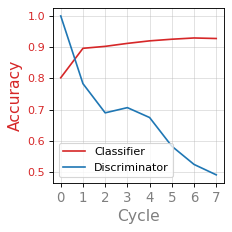

In [13]:
R.plot()